In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          #,'text.usetex': False
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

### Check the wildfire data

In [2]:
wildfire= pd.read_csv('orig/Wildfires_byCountyYear.csv')

In [3]:
wildfire

,County,Year,Total number of acres burned
0,Alameda,2015,3458
1,Alpine,2015,0
2,Amador,2015,70892
3,Butte,2015,16
4,Calaveras,2015,293
5,Colusa,2015,79
6,Contra Costa,2015,363
7,Del Norte,2015,6
8,El Dorado,2015,376
9,Fresno,2015,393


In [4]:
wildfire.describe()

,Year,Total number of acres burned
count,870.000000,870.000000
mean,2008.000000,3148.503448
std,4.322979,17972.043909
min,2001.000000,0.000000
25%,2004.000000,6.250000
50%,2008.000000,221.000000
75%,2012.000000,866.000000
max,2015.000000,350409.000000


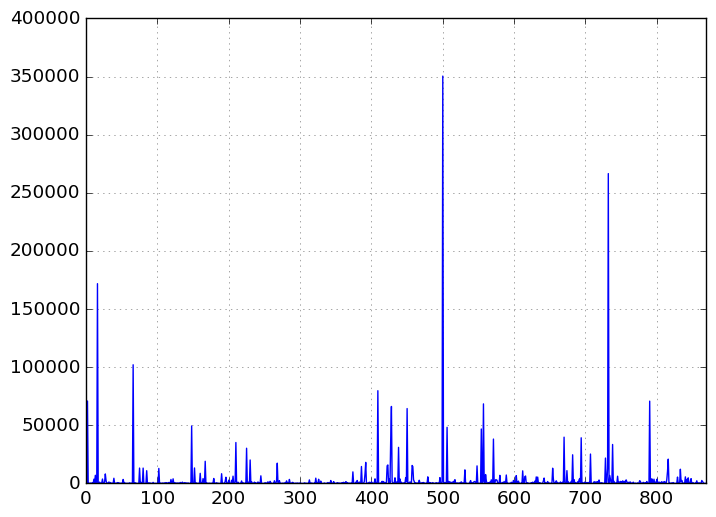

In [44]:
wildfire['Total number of acres burned'].plot()

No NaN values

In [42]:
wildfire.isnull().any()

County                          False
Year                            False
Total number of acres burned    False
dtype: bool

### Normalize number of acres by land mass for each county

In [62]:
landarea= pd.read_csv('Census_byCounty.csv',usecols=[0,22])

In [64]:
# conversion between sq miles and acres (1 sq mile = 640 acres)
conv= 640

In [70]:
landarea.head()

,County,Land area in square miles
0,Alameda,739.02
1,Alpine,738.33
2,Amador,594.58
3,Butte,1636.46
4,Calaveras,1020.01


In [84]:
tmp_df= pd.merge(wildfire,landarea,on='County')

landarea_acres= conv*tmp_df['Land area in square miles']

tmp_df['Area burned percent']= 100.*tmp_df['Total number of acres burned']/landarea_acres

In [86]:
tmp_df

,County,Year,Total number of acres burned,Land area in square miles,Area burned percent
0,Alameda,2015,3458,739.02,0.731120
1,Alameda,2014,130,739.02,0.027486
2,Alameda,2013,843,739.02,0.178234
3,Alameda,2012,115,739.02,0.024314
4,Alameda,2011,1507,739.02,0.318623
5,Alameda,2010,850,739.02,0.179714
6,Alameda,2009,545,739.02,0.115229
7,Alameda,2008,196,739.02,0.041440
8,Alameda,2007,426,739.02,0.090069
9,Alameda,2006,260,739.02,0.054971


In [92]:
wildfire= tmp_df.reindex(columns=tmp_df.columns[[0,1,4]])

In [109]:
wildfire.to_csv('temp_Wildfires.csv')

In [93]:
wildfire.describe()

,Year,Area burned percent
count,870.000000,870.000000
mean,2008.000000,0.230918
std,4.322979,1.266701
min,2001.000000,0.000000
25%,2004.000000,0.000599
50%,2008.000000,0.018306
75%,2012.000000,0.082329
max,2015.000000,21.370681


In [102]:
wildfire[wildfire['Area burned percent']>5.].sort_values(by='Area burned percent', ascending=False)

,County,Year,Area burned percent
240,Lake,2015,21.370681
30,Amador,2015,18.629747
548,San Diego,2007,13.015503
552,San Diego,2003,9.900109
121,El Dorado,2014,9.339521
52,Butte,2008,7.616097
851,Yolo,2004,6.046028
638,Santa Clara,2007,5.846688


### Check variation per county

In [103]:
inds2015= (wildfire['Year']==2015)
inds2014= (wildfire['Year']==2014)

In [104]:
counties= np.array(wildfire.loc[inds2015,'County'])
N_counties= len(counties)

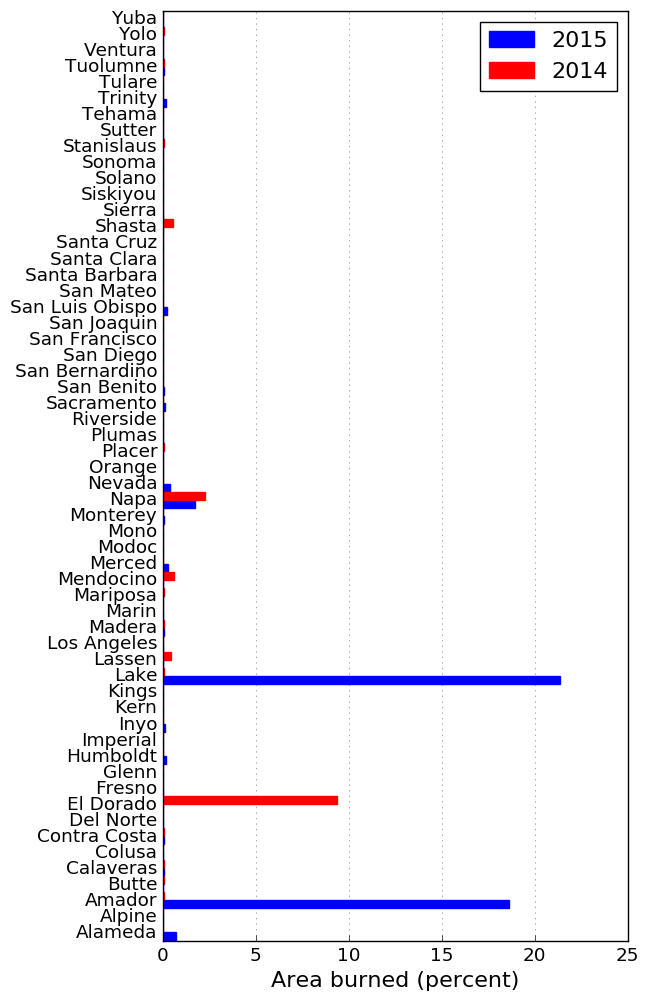

In [108]:
plt.figure(figsize=(6,12))
ax= plt.subplot(111)

indsPLT= np.arange(N_counties)
width= 0.5

plt.barh(indsPLT, wildfire.loc[inds2015,'Area burned percent'], height=width, color='b',ec='b', label='2015')
plt.barh(indsPLT+0.5, wildfire.loc[inds2014,'Area burned percent'], height=width, color='r',ec='r', label='2014')

plt.legend(loc='best')
plt.ylim(0,N_counties)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,counties)
plt.xlabel('Area burned (percent)')

ax.yaxis.set_ticks_position('none')
# ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

### Check variation with time

In [131]:
inds1= wildfire['County']=='Sacramento'
inds2= wildfire['County']=='Lake'
inds3= wildfire['County']=='Napa'

In [138]:
wildfire_1= wildfire.loc[inds1]
wildfire_2= wildfire.loc[inds2]
wildfire_3= wildfire.loc[inds3]

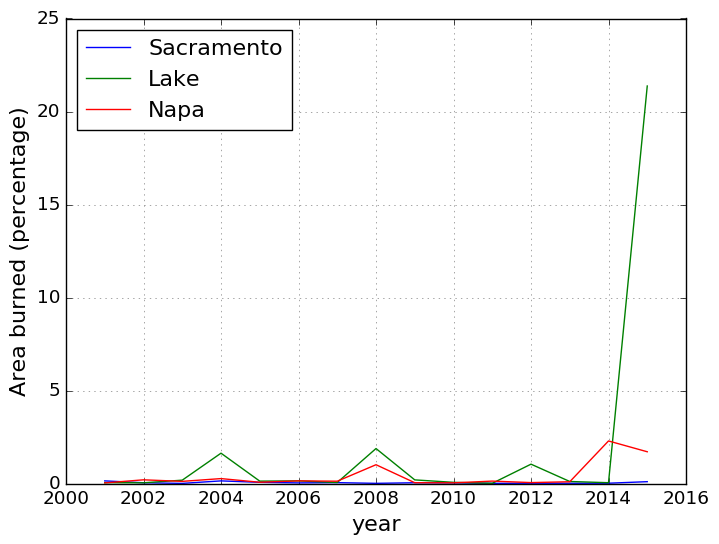

In [143]:
plt.plot(wildfire_1['Year'],wildfire_1['Area burned percent'],label=wildfire_1.iat[0,0])
plt.plot(wildfire_2['Year'],wildfire_2['Area burned percent'],label=wildfire_2.iat[0,0])
plt.plot(wildfire_3['Year'],wildfire_3['Area burned percent'],label=wildfire_3.iat[0,0])
plt.legend(loc='best')
plt.ylabel('Area burned (percentage)')
plt.xlabel('year')
# plt.ylim(0,1)